In [0]:
import psycopg2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import datetime 

# importing copy module 
import copy 
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras import metrics
from keras.callbacks import TensorBoard


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler #, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time
import sys

import warnings
warnings.filterwarnings("ignore")

!pip install -U -q PyDrive


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# !pip install hyperas

from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q': "'1Y1S3y59FTzcWn77uqkYzbSKBwkadIUEy' in parents and trashed=false"}).GetList() # id of colab notes in drive 
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id'])) # chose which csv u want to download

W0709 16:32:03.908055 140327080302464 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

title: Stateful LSTM v3.ipynb, id: 16k84lrJtOJWJPEw-jR1CBswDn3TBHfh1
title: Adaboost Regressor.ipynb, id: 1Brppd-4gLPDA_EAWcpaDuAGHo9wCDCjE
title: VAR-Vector Autoregressif Regression Model- TS  forecasting.ipynb, id: 1JMHHsj6KGhoiIQY4zqpqEx6rjWRd6e8l
title: LSTM v3.ipynb, id: 1JD355WJ1tCmQxpklbvI0TZzvtoX-UMRG
title: Untitled3.ipynb, id: 1mdw0iGEJlF52DvSOYxDlt0HB1mjuued8
title: arima_time_series.ipynb, id: 13bqq0yCE4n-bmiAwZ0H9z7Ol7fDwmrhP
title: Untitled2.ipynb, id: 1-z5pjECgQgRjAukNQOUgzidoVfTUySUf
title: Untitled1.ipynb, id: 1Jct3IwUHmyGSxW0ljTdWTPgL546H6stC
title: Untitled, id: 1d0m5GkaV2IOz3qBkDCCHoNz09XzTql7U
title: VAR-Vector Autoregressif Regression Model- TS  forecasting.ipynb, id: 1iwZ1LAFdcOmniKM6uViWxzEKZUgrSphH
title: datapreprocess.py, id: 1C6H4Xw2PZ3VCjVxQ-xXBEiAhxC7VnL7h
title: Orig_data.csv, id: 1--v137MRLlIjs_RyjycDlQEn_dpzsq_p
title: Grouped_data_unfiltered.csv, id: 1--savgur5M36coH960hsPiQ3qJOC99u_
title: Orig_data.csv, id: 1nRr7SBfAT5MpPiyi5fXNyEGtogIyqXVK
title: fi

In [0]:
# try:
#     connection = psycopg2.connect(user="sesyr",
#                                   password="SeSyR54",
#                                   host="51.254.68.36",
#                                   port="5432",
                  
#                                   database="donnees_trafic")
#     cursor = connection.cursor()

#     # Print PostgreSQL version
#     cursor.execute("SELECT version();")
#     record = cursor.fetchone()
#     print("You are connected to - ", record,"\n")
    
#     postgreSQL_select_Query = """
#     WITH metadata AS (
#           SELECT ist.macrosection,
#          ist.code_centrale,
#          cnl.code_canal,
#          sc.sens,
#          cc.id_nature_mesure, cc.libelle
#         FROM rdv.info_section_troncon ist
#         JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
#     JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
#     JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
#     JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%QT_360 %'::text
    
#     ), metadatavt AS (
#           SELECT distinct ist.macrosection,
#          ist.code_centrale,
#          cnl.code_canal,
#          sc.sens,
#          cc.id_nature_mesure, cc.libelle
#         FROM rdv.info_section_troncon ist
#         JOIN rdv.sens_canal sc ON sc.sens::text = ist.sens::text
#     JOIN myrabel.centrale c ON c.code_centrale = ist.code_centrale::bpchar
#     JOIN myrabel.canal cnl ON cnl.id_centrale = c.id_centrale AND cnl.code_canal::text = sc.canal::text
#     JOIN myrabel.cal_canal cc ON cc.id_canal = cnl.id_canal AND cc.libelle ~~ '%VT_360 %'::text
#     )
    
#     SELECT 
       
#        m.macrosection,
#        m.sens,
#        m.code_centrale,
#        m.code_canal, 
       
        
#        ts,
#        dq.valeur AS qt,
#        dv.valeur AS vt
       
       
#       FROM metadata  m
#       JOIN metadatavt v
#       ON m.macrosection = v.macrosection AND m.sens = v.sens AND m.code_centrale = v.code_centrale AND  m.code_canal=  v.code_canal
     
#       CROSS JOIN generate_series('2016-01-01' , '	2018-10-08','01:00:00'::interval) AS  ts(ts)
      
#       LEFT JOIN myrabel.mesure_2 dq    
#       ON dq.id_nature_mesure = m.id_nature_mesure
#       AND dq.date_mesure = ts 
      
#         LEFT JOIN myrabel.mesure_2 dv    
#       ON dv.id_nature_mesure = v.id_nature_mesure
#       AND dv.date_mesure = ts
      
      
#         --WHERE(  dv.date_mesure IS NULL OR dq.date_mesure IS NULL OR dv.date_mesure = dq.date_mesure )
      
#      -- WHERE dq.date_mesure IS NOT  NULL AND dv.date_mesure IS NULL  --OR dq.date_mesure IS NULL
      
#       """
    

#     cursor.execute(postgreSQL_select_Query)
#     print("Selecting rows from mobile table using cursor.fetchall")
#     records = cursor.fetchall() 
   
#    # print("Print each row and it's columns values")
#     #for row in records:
#        #   print("Macrosection = ", row[0])
#         #  print("sens = ", row[1])
#          # print("code centrale   = ", row[2])
#           #print(" code canal = ", row[3])
#           #print("date_mesure = ", row[4])
#          # print("qt_360 = ", row[5]) 
#           #print("Vt_360 = ", row[6],"\n" )
            
            
# except (Exception, psycopg2.Error) as error :
#     print ("Error while connecting to PostgreSQL", error)
        
# finally:
#     #closing database connection.
#         if(connection):
#             cursor.close()
#             connection.close()
#             print("PostgreSQL connection is closed")            

In [0]:
def get_non_null(df):
    lngth = min(list(len(col.dropna()) for ind, col in df.iteritems()))
    df = pd.concat(list(df.loc[:,col].dropna().head(lngth).reset_index(drop=True) for col in df),axis=1)
    return df
  
  
  
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data
  
  

####################################################################

# My package for preprocessing for training
  
####################################################################### 

def countcensor(dfx):
    '''
    function to identify and count values in dataframe columns that are censored (==0) or
    negative values. Asks to convert the values to the lowest positive, non-zero value in the 
    column.
    Input = dataframe of raw data
    Output = dataframe of data cleaned of censored values or original data
    '''    
    names = list(dfx)
    censor_count = []
    dfx_length = len(dfx.columns)
    print("\nCensored data in each feature:")
    for i in range(dfx_length):
        censor_count.append((dfx.iloc[:,i]<=0.).sum())  ## count values and add to list
        print('{0:4s} {1:2d}'.format(names[i], censor_count[i]))
   
    try:
        censor_correct = input("Convert censored and negative data to lowest positive value? (Default = n)? ")
    except ValueError:
        censor_correct = "y"
        
    if censor_correct == "y":
        ##### if feature has censored data or negative data, replace it 
        ##### with the smallest positive, non-zero value
        print("\nFeature minimum positive values:") ### for space
        
        for i in range(dfx_length):
            if censor_count[i]>0:
                xarray = np.asarray(dfx.iloc[:,i].sort_values())  #sort column and convert to array
                xmin = xarray[censor_count[i]+1] #select smallest, positive, non-zero value
                dfx.iloc[:,i][dfx.iloc[:,i]<= 0.] = xmin  ### replace censored values with min value
            else:
                xmin = 0.
            print('{0:4s} {1:3f}'.format(names[i], xmin))        
        print("\nCensored and negative values converted to feature's smallest positive, non-zero value.")
        
    else:
        print("\nCensored and negative values not converted.")
 
    return dfx
#################################################################


def checkoutliers(dfx):
    '''
    function to identify and count possible outliers in dataframe columns 
    Input = dataframe of data
    Output = none
    ''' 
    names = list(dfx)
    out_count = []
    dfx_length = len(dfx.columns)
    print("\nPossible outliers in each feature:")
    for i in range(dfx_length):
        dfx_test = 3*dfx.iloc[:,i].mean()  ##define test for outlier
        out_count.append((dfx.iloc[:,i]>dfx_test).sum())  ## count values and add to list
        #print(names[i])
        #print(out_count[i],'\n')
    return

def checknans(dfx):
    '''
    function to identify and count NaNs in dataframe columns 
    Input = dataframe of data
    Output = none
    ''' 
    names = list(dfx)
    nan_count = []
    dfx_length = len(dfx.columns)
    print("\nNaN data in each feature:")
    for i in range(dfx_length):
        nan_count.append(dfx.iloc[:,i].isnull().sum())  ## count values and add to list
        #print(names[i] )
        #print(nan_count[i])
    return

def badzeros(dfx):
    '''
    function to convert NaN values to 0 and add a column that shows them as NaNs
    Input = dataframe of data and target column to replace NaNs with zeros
    Output = numpy matrix of data concatenated with binary filters and dataframe of
    features and first occurance of NaN and outlier.
    ''' 
    ###### call other local functions to replace censored data and 
    ###### check for NaNs and outliers
    dfx = countcensor(dfx)
    checknans(dfx)
    checkoutliers(dfx)
    
    names = list(dfx)
    
    np_nan = np.matrix(dfx)  #convert dataframe to matrix
    
    np_clean =  np.nan_to_num(np_nan) #convert NaNs to 0's
    
    np_row,np_col = np.shape(np_nan)
    
#     np_z1 = np.zeros((np_row,np_col))  #make a binary filter for where NaNs were
#     np_z1 = (np_clean == 0.) + 0.
    
#     np_z2 = np.zeros((np_row,np_col)) #make a binary filter for possible outliers
#     np_z2 = (np_clean > np_clean.mean(axis=1)*5) + 0.
    np_ready = np_clean #np.concatenate((np_clean, np_z1, np_z2), axis=1)  #merge matrices together
    
#     a = []
    
#     for i in range(np_col):
      
#         arnan = np_ready[:,i+np_col]
#         arout = np_ready[:,i+(2*np_col)]
        
#         tnan = np.nonzero(arnan == 1.)
        
#         if arnan.sum()>0.: # sum of not Nan is greater than zero 
#             tnan_first = tnan[0][0]
#         else:
#             tnan_first = np_row
        
#         tout = np.nonzero(arout == 1.)
        
#         if arout.sum()>0.:
#             tout_first = tout[0][0]
#         else:
#             tout_first = np_row   
        
#         a.append(names[i])
#         a.append(tnan_first)
#         a.append(tout_first)
        
#         col_names = ["Name","1st NaN", "1st Outlier"]
#         dfa = pd.DataFrame(np.array(a).reshape(-1,3), columns = col_names)
    
    return np_ready #, dfa
  
  # convert an array of values into a dataset matrix
def TensorForm(data, look_back):
    #determine number of data samples
    rows_data,cols_data = np.shape(data)
    
    #determine # of batches based on look-back size
    tot_batches = int(rows_data-look_back)+1
    
    #initialize 3D tensor
    threeD = np.zeros(((tot_batches,look_back,cols_data)))
    
    # populate 3D tensor
    for sample_num in range(tot_batches):
        for look_num in range(look_back):
            threeD[sample_num,:,:] = data[sample_num:sample_num+(look_back),:]
    
    return threeD
#################################################################################################################################################

# ROCAUC implementation to adapt for KERAS training

#################################################################################################
  
class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return
      
      

In [0]:
file_name= drive.CreateFile({'id': '1--v137MRLlIjs_RyjycDlQEn_dpzsq_p'})
file_name.GetContentFile('Orig_data.csv')

df = pd.read_csv('Orig_data.csv') #2018-10-07 22:00:00+00:00	

df = df.drop(df.columns[0],axis = 1)

df

# df = pd.DataFrame(records, columns=['Macrosection','sens','code_centrale','code_canal','date','qt_360','vt_360'])

# #df['Macrosection'].values
# # strip code canal which is a char of 3 character with whitespace
# # df['code_canal'] = df['code_canal'].str.strip()


# df.date = pd.to_datetime(df.date, format= "%Y-%m-%d %H" ,utc= True)

# df.sort_values(by='date')

# df_hours_float = df.date.dt.hour + df.date.dt.minute/60.0


# df['cos_Feature_hour']=np.sin(2.*np.pi*df_hours_float/24.)
# df['sin_Feature_hour']=np.cos(2.*np.pi*df_hours_float/24.)

# #df= df.set_index('date')

# df = df.drop(["sens", "Macrosection"], axis=1)
# #df = df.replace(0,np.NaN) # np.NaN ca va marcher , np.nan doesnt work anymore !!
# df['vt_360'] = df['vt_360'].replace(0,np.NaN)
# df['qt_360'] = df['qt_360'].replace(0,np.NaN)


# print(df.shape) # (655128 , 7)  for '2016-01-01' , '2018-10-08','01:00:00'

# df

,code_centrale,code_canal,date,qt_360,vt_360,cos_Feature_hour,sin_Feature_hour
0,MZE54.3,0,2015-12-31 23:00:00+00:00,15.0,98.000,-2.588190e-01,9.659258e-01
1,MZE54.3,0,2016-01-01 00:00:00+00:00,11.0,105.000,0.000000e+00,1.000000e+00
2,MZE54.3,0,2016-01-01 01:00:00+00:00,24.0,110.000,2.588190e-01,9.659258e-01
3,MZE54.3,0,2016-01-01 02:00:00+00:00,51.0,109.000,5.000000e-01,8.660254e-01
4,MZE54.3,0,2016-01-01 03:00:00+00:00,31.0,106.000,7.071068e-01,7.071068e-01
5,MZE54.3,0,2016-01-01 04:00:00+00:00,24.0,102.000,8.660254e-01,5.000000e-01
6,MZE54.3,0,2016-01-01 05:00:00+00:00,28.0,102.000,9.659258e-01,2.588190e-01
7,MZE54.3,0,2016-01-01 06:00:00+00:00,9.0,102.000,1.000000e+00,6.123234e-17
8,MZE54.3,0,2016-01-01 07:00:00+00:00,9.0,108.000,9.659258e-01,-2.588190e-01
9,MZE54.3,0,2016-01-01 08:00:00+00:00,16.0,103.000,8.660254e-01,-5.000000e-01


In [0]:
# df.to_csv('Orig_data.csv')
# !cp Orig_data.csv drive/My\ Drive/

In [0]:
DataFrameDict=df.groupby(['code_canal','code_centrale'])
    
# #print to s
# for key, item in DataFrameDict:
#     print (key)
#     print(DataFrameDict.get_group(key)[['qt_360','vt_360']], "\n\n")
#     #DataFrameDict.get_group(key).to_csv(r'C:\Users\hp\Desktop\Stage IOT TS\grouping_by_codes'+ str(key) +'.csv')   
    
group = [0]*len(DataFrameDict)
for i, (k, v) in enumerate(DataFrameDict):
    group[i] = DataFrameDict.get_group(k)
    

for i in range(len(group)):
      group[i] = group[i].drop(["code_centrale", "code_canal"], axis=1)
         
      if (i != len(group)-1):
           group[i] = group[i].drop([  "cos_Feature_hour" , "sin_Feature_hour" ], axis=1)   
          
# #del group[12]
for i in range(len(group)):
       print('group : {0} :::::: Missing data percentage {1}'.format(i,group[i].isnull().sum()/group[i].isnull().count() *100 ),'\n') 

len(group)

merged = group[0]
for i in range(len(group)-1):
      merged = pd.merge(merged,group[i+1], on='date',how ='left')
    
merged

group : 0 :::::: Missing data percentage date      0.000000
qt_360    3.705077
vt_360    3.709199
dtype: float64 

group : 1 :::::: Missing data percentage date      0.000000
qt_360    3.655621
vt_360    3.655621
dtype: float64 

group : 2 :::::: Missing data percentage date       0.000000
qt_360    21.204253
vt_360    25.556380
dtype: float64 

group : 3 :::::: Missing data percentage date       0.000000
qt_360    10.789647
vt_360    10.744313
dtype: float64 

group : 4 :::::: Missing data percentage date       0.000000
qt_360    20.787999
vt_360    20.812727
dtype: float64 

group : 5 :::::: Missing data percentage date      0.000000
qt_360    3.700956
vt_360    3.705077
dtype: float64 

group : 6 :::::: Missing data percentage date      0.000000
qt_360    3.622651
vt_360    3.746291
dtype: float64 

group : 7 :::::: Missing data percentage date      0.000000
qt_360    3.659743
vt_360    3.672107
dtype: float64 

group : 8 :::::: Missing data percentage date      0.000000
qt_360    2

,date,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360_x,vt_360_x,qt_360_y,vt_360_y,qt_360,vt_360,cos_Feature_hour,sin_Feature_hour
0,2015-12-31 23:00:00+00:00,15.0,98.0,10.0,82.0,14.0,91.6667,10.0,96.0000,NaN,NaN,8.0,96.0,NaN,NaN,4.0,93.0,1.0,85.0,2.0,103.000,6.0,104.3330,7.0,93.3333,NaN,NaN,NaN,NaN,NaN,NaN,1.0,94.000,NaN,NaN,NaN,NaN,1.0,48.0,NaN,NaN,2.0,118.000,2.0,130.0000,NaN,NaN,NaN,NaN,3.0,79.3333,NaN,NaN,NaN,NaN,-2.588190e-01,9.659258e-01
1,2016-01-01 00:00:00+00:00,11.0,105.0,9.0,96.0,10.0,107.6670,8.0,105.3330,NaN,NaN,23.0,108.0,17.0,105.0,21.0,101.0,17.0,98.0,11.0,113.333,26.0,104.6670,20.0,110.0000,NaN,NaN,NaN,NaN,2.0,64.0,1.0,86.000,NaN,NaN,NaN,NaN,3.0,44.0,NaN,NaN,3.0,121.000,3.0,127.3330,NaN,NaN,NaN,NaN,11.0,95.6667,NaN,NaN,NaN,NaN,0.000000e+00,1.000000e+00
2,2016-01-01 01:00:00+00:00,24.0,110.0,24.0,102.0,27.0,102.6670,27.0,106.6670,NaN,NaN,30.0,103.0,24.0,108.0,24.0,101.0,34.0,102.0,15.0,109.000,25.0,108.0000,27.0,109.3330,NaN,NaN,NaN,NaN,1.0,44.0,1.0,108.000,3.0,97.6667,NaN,NaN,4.0,51.0,NaN,NaN,2.0,112.000,1.0,122.0000,NaN,NaN,NaN,NaN,12.0,82.6667,NaN,NaN,NaN,NaN,2.588190e-01,9.659258e-01
3,2016-01-01 02:00:00+00:00,51.0,109.0,45.0,96.0,41.0,103.6670,28.0,101.0000,NaN,NaN,35.0,104.0,40.0,106.0,30.0,101.0,42.0,99.0,14.0,113.667,33.0,103.0000,34.0,106.0000,NaN,NaN,NaN,NaN,1.0,54.0,7.0,116.000,5.0,122.6670,NaN,NaN,11.0,52.0,2.0,114.000,2.0,106.000,2.0,110.0000,NaN,NaN,NaN,NaN,16.0,88.0000,NaN,NaN,NaN,NaN,5.000000e-01,8.660254e-01
4,2016-01-01 03:00:00+00:00,31.0,106.0,27.0,99.0,29.0,103.3330,28.0,103.0000,NaN,NaN,39.0,107.0,39.0,105.0,33.0,104.0,41.0,99.0,17.0,114.000,33.0,107.0000,36.0,109.3330,NaN,NaN,NaN,NaN,1.0,51.0,2.0,108.000,2.0,111.0000,NaN,NaN,4.0,57.0,3.0,115.667,6.0,115.667,3.0,122.0000,NaN,NaN,NaN,NaN,16.0,96.0000,NaN,NaN,NaN,NaN,7.071068e-01,7.071068e-01
5,2016-01-01 04:00:00+00:00,24.0,102.0,22.0,96.0,23.0,109.6670,19.0,114.0000,NaN,NaN,32.0,104.0,19.0,105.0,22.0,103.0,25.0,96.0,21.0,109.667,27.0,107.0000,30.0,106.6670,NaN,NaN,NaN,NaN,NaN,NaN,1.0,108.000,NaN,NaN,NaN,NaN,2.0,52.0,2.0,128.000,3.0,118.000,2.0,116.6670,NaN,NaN,NaN,NaN,9.0,94.6667,NaN,NaN,NaN,NaN,8.660254e-01,5.000000e-01
6,2016-01-01 05:00:00+00:00,28.0,102.0,19.0,92.0,26.0,100.3330,27.0,102.0000,NaN,NaN,18.0,100.0,15.0,109.0,14.0,98.0,20.0,103.0,14.0,121.333,20.0,98.3333,19.0,107.6670,NaN,NaN,NaN,NaN,NaN,NaN,4.0,111.000,1.0,106.0000,NaN,NaN,9.0,53.0,NaN,NaN,2.0,98.000,1.0,NaN,NaN,NaN,NaN,NaN,9.0,91.3333,NaN,NaN,NaN,NaN,9.659258e-01,2.588190e-01
7,2016-01-01 06:00:00+00:00,9.0,102.0,10.0,88.0,8.0,99.0000,9.0,106.0000,NaN,NaN,19.0,99.0,16.0,104.0,11.0,97.0,12.0,100.0,7.0,116.333,15.0,113.6670,21.0,106.6670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,52.0,1.0,114.000,1.0,166.000,NaN,NaN,NaN,NaN,NaN,NaN,6.0,99.6667,NaN,NaN,NaN,NaN,1.000000e+00,6.123234e-17
8,2016-01-01 07:00:00+00:00,9.0,108.0,13.0,86.0,8.0,108.0000,8.0,99.6667,NaN,NaN,7.0,101.0,11.0,110.0,9.0,102.0,13.0,103.0,4.0,100.333,15.0,112.6670,9.0,123.3330,NaN,NaN,NaN,NaN,2.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,86.0000,NaN,NaN,NaN,NaN,9.659258e-01,-2.588190e-01
9,2016-01-01 08:00:00+00:00,16.0,103.0,13.0,93.0,16.0,109.0000,15.0,107.6670,NaN,NaN,19.0,105.0,12.0,108.0,18.0,102.0,13.0,102.0,11.0,112.667,17.0,112.0000,15.0,110.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,55.0,NaN,NaN,3.0,118.000,2.0,116.0000,NaN,NaN,NaN,NaN,9.0,100.6670,NaN,NaN,NaN,NaN,8.660254e-01,-5.000000e-01


In [0]:
merged.columns = ['date',
                  'qt_dv00', 'vt_dv00',
                  'qt_dv01', 'vt_dv01',
                  'qt_dv02', 'vt_dv02',
                  'qt_dv03', 'vt_dv03', 
                  'qt_dv04', 'vt_dv04',
                  
                  'qt_dv05', 'vt_dv05',
                  'qt_dv06', 'vt_dv06',
                  'qt_dv07', 'vt_dv07',
                  'qt_dv08', 'vt_dv08',
                  
                  'qt_dv09', 'vt_dv09',
                  'qt_dv10', 'vt_dv10', 
                  'qt_dv11', 'vt_dv11',
                  'qt_dv12', 'vt_dv12', 
                  'qt_dv13', 'vt_dv13',
                  
                  'qt_dv14', 'vt_dv14',
                  'qt_dv15', 'vt_dv15',
                  'qt_dv16', 'vt_dv16', 
                  'qt_dv17', 'vt_dv17',
                  'qt_dv18', 'vt_dv18',
                  'qt_dv19', 'vt_dv19', 
                  
                  'qt_dv20', 'vt_dv20',
                  'qt_dv21', 'vt_dv21',
                  'qt_dv22', 'vt_dv22',
                  'qt_dv23', 'vt_dv23',
                  'qt_dv24', 'vt_dv24',
                  'qt_dv25', 'vt_dv25', 
                  'qt_dv26', 'vt_dv26',
                  
                  'cos_Feature_hour',
                  'sin_Feature_hour'
            ]

In [0]:
# take the data witn Non NaN values the data is adapted in the least number of a column
Dataset = copy.deepcopy(merged)

filtered_df = get_non_null(Dataset)

filtered_df = filtered_df.set_index("date")

Dataset = filtered_df

Dataset.shape

(11592, 56)

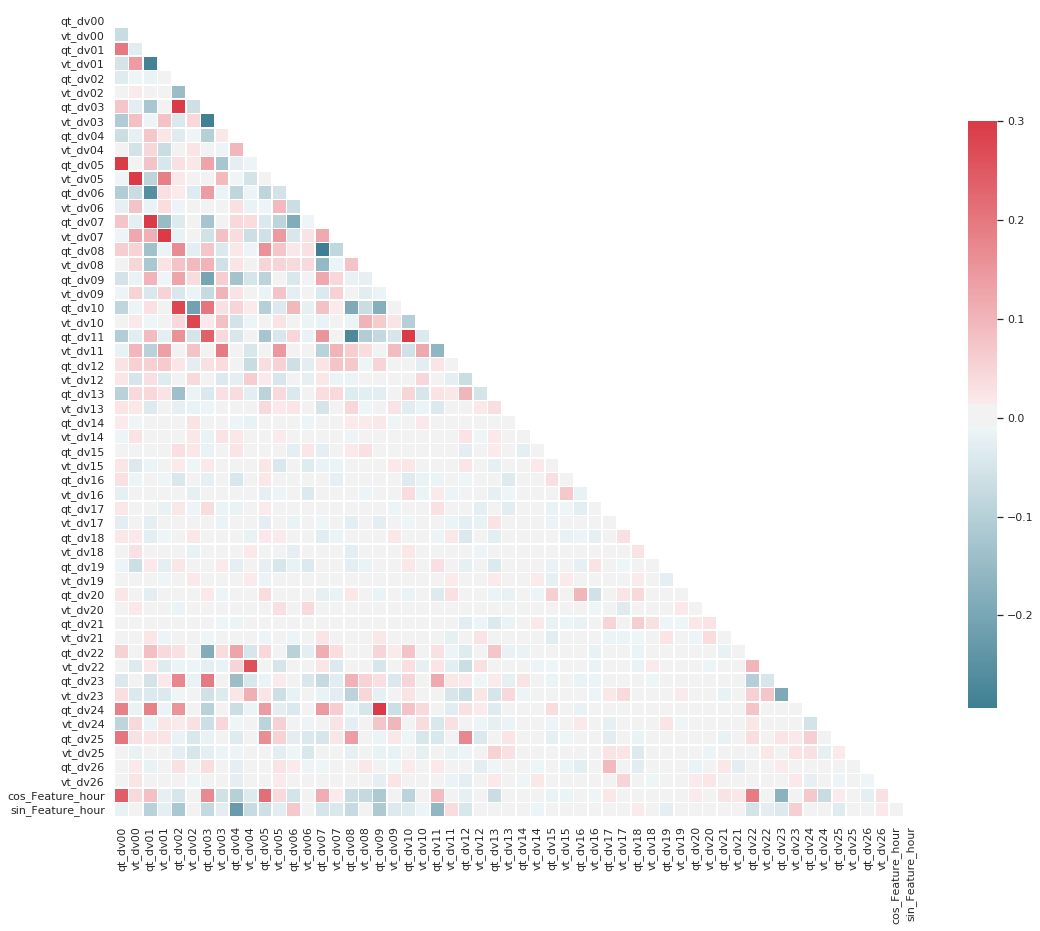

In [0]:
from string import ascii_letters


sns.set(style="white")


# Compute the correlation matrix
corr = Dataset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, 
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

In [0]:
# merged.to_csv('Grouped_data_unfiltered.csv')
# !cp Grouped_data_unfiltered.csv drive/My\ Drive/

In [0]:
last_col = np.shape(Dataset)[1] - 3

#np_dft, a_dft = badzeros(Dataset)

np_dft = badzeros(Dataset)

print("\n")

rows_in,cols_in = np.shape(np_dft)

print(cols_in)

print("\n")
a = list(Dataset)  #makes a list of the column names in the dataframe
for i in range (len(a)):    #prints a list of the column names
    print (i, a[i])
# pick column to predict
try:
    target_col = int(input("Select the column number to predict (default = " + a[last_col] + "): "))
except ValueError:
    target_col = last_col   #choose last column as default

#choose look-ahead to predict   
try:
    lead_time =  int(input("How many hours ahead to predict (default = 1)? "))
except ValueError:
    lead_time = 1
    

#convert to floating numpy arrays
dataset1 = np_dft.astype('float32')
dataplot1 = dataset1[lead_time:,target_col]  #shift training data

datatopred = dataset1[:lead_time,target_col]
datatopredI = dataset1[:lead_time,:]


dataplot1 = dataplot1.reshape(-1,1)

# print("{} :::: {}".format(np.shape(dataplot1),np.shape(datatopred)))
# normalize the dataset
process = 'y'
process = input("Does the data need to be pre-preprocessed Y/N?  ")


# first scales the dataset and then splits it up into Training and Testing subsets. but it was not smart to do that,  
# This means that information about the Testing subset  has "leaked" into the Training subset.

if str(process) == 'y' or 'Y':
    scalerX = MinMaxScaler(feature_range=(0, 1))
    scalerY = MinMaxScaler(feature_range=(0, 1))
    dataset = scalerX.fit_transform(dataset1)
    dataplot = scalerY.fit_transform(dataplot1)
    
    print('\nData processed using MinMaxScaler')
    
if str(process) == 'n':
    print('\nData not processed')
    dataset=dataset1
    dataplot=dataplot1
    
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, : ], dataset[train_size:len(dataset), : ]  # take all columns into the train and test

print("{} {}".format(np.shape(train),np.shape(test)))


Censored data in each feature:
qt_dv00  0
vt_dv00  0
qt_dv01  0
vt_dv01  0
qt_dv02  0
vt_dv02  0
qt_dv03  0
vt_dv03  0
qt_dv04  0
vt_dv04  0
qt_dv05  0
vt_dv05  0
qt_dv06  0
vt_dv06  0
qt_dv07  0
vt_dv07  0
qt_dv08  0
vt_dv08  0
qt_dv09  0
vt_dv09  0
qt_dv10  0
vt_dv10  0
qt_dv11  0
vt_dv11  0
qt_dv12  0
vt_dv12  0
qt_dv13  0
vt_dv13  0
qt_dv14  0
vt_dv14  0
qt_dv15  0
vt_dv15  0
qt_dv16  0
vt_dv16  0
qt_dv17  0
vt_dv17  0
qt_dv18  0
vt_dv18  0
qt_dv19  0
vt_dv19  0
qt_dv20  0
vt_dv20  0
qt_dv21  0
vt_dv21  0
qt_dv22  0
vt_dv22  0
qt_dv23  0
vt_dv23  0
qt_dv24  0
vt_dv24  0
qt_dv25  0
vt_dv25  0
qt_dv26  0
vt_dv26  0
cos_Feature_hour 5796
sin_Feature_hour 5796
Convert censored and negative data to lowest positive value? (Default = n)? 

Censored and negative values not converted.

NaN data in each feature:

Possible outliers in each feature:


56


0 date
1 qt_dv00
2 vt_dv00
3 qt_dv01
4 vt_dv01
5 qt_dv02
6 vt_dv02
7 qt_dv03
8 vt_dv03
9 qt_dv04
10 vt_dv04
11 qt_dv05
12 vt_dv05
13 qt_dv

In [0]:
# prepare output arrays
trainY, testY = dataplot[0:train_size], dataplot[train_size:len(dataplot)]

n,p = np.shape(trainY)


print( " rows : {}  col : {}".format(n, p) )

if n < p:
    trainY = trainY.T
    testY = testY.T

# resize input sets
trainX1 = train[:len(trainY),]
testX1 = test[:len(testY),]

# get number of epochs
try:
    n_epochs = int(input("Number of epochs? (Default = 10)? "))
except ValueError:
    n_epochs = 10

# prepare input Tensors
try:
    look_back = int(input("Number of recurrent (look-back) units? (Default = " + str(lead_time+2) + ")? "))
except ValueError:
    look_back = lead_time+2

# mini-batch size    
n_batch = 72
    
# get final approval to compile and train

print('\nInput summary')
print('Training on ' + a[target_col])
print('Number of input features is ' + str(cols_in))
print('Prediction horizon is ' + str(lead_time))
print('Number of training epochs is ' + str(n_epochs))
print('Number of recurrent units is ' + str(look_back))
print('Number of samples/batch is ' + str(n_batch))

 rows : 9273  col : 1
Number of epochs? (Default = 10)? 30
Number of recurrent (look-back) units? (Default = 26)? 15

Input summary
Training on vt_dv00
Number of input features is 56
Prediction horizon is 24
Number of training epochs is 30
Number of recurrent units is 15
Number of samples/batch is 72


In [0]:
### Make training/testing tensors       
trainX = TensorForm(trainX1, look_back)
testX = TensorForm(testX1, look_back)


print(np.shape(trainX)[2])

print('Number of training samples is ' + str(len(trainX)))

print('Number of test samples is ' + str(len(testX)))


def data():
   
    return trainX, trainY, testX, testY
  

56
Number of training samples is 9259
Number of test samples is 2281


W0709 16:35:34.437144 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 16:35:34.483089 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 16:35:34.491253 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Building model...


W0709 16:35:35.048351 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0709 16:35:35.062485 140327080302464 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0709 16:35:35.662714 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 156)           132912    
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 100)           102800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 15, 100)           80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 100)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
__________

W0709 16:35:36.102631 140327080302464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 16:35:39.034407 140327080302464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 9259 samples, validate on 2281 samples
Epoch 1/30
9259/9259 [==============================] - 26s 3ms/step - loss: 0.0435 - mean_absolute_error: 0.1638 - val_loss: 0.0399 - val_mean_absolute_error: 0.1531
Epoch 2/30
9259/9259 [==============================] - 19s 2ms/step - loss: 0.0238 - mean_absolute_error: 0.1160 - val_loss: 0.0321 - val_mean_absolute_error: 0.1395
Epoch 3/30
9259/9259 [==============================] - 19s 2ms/step - loss: 0.0192 - mean_absolute_error: 0.1042 - val_loss: 0.0251 - val_mean_absolute_error: 0.1225
Epoch 4/30
9259/9259 [==============================] - 19s 2ms/step - loss: 0.0162 - mean_absolute_error: 0.0942 - val_loss: 0.0216 - val_mean_absolute_error: 0.1117
Epoch 5/30
9259/9259 [==============================] - 19s 2ms/step - loss: 0.0143 - mean_absolute_error: 0.0873 - val_loss: 0.0164 - val_mean_absolute_error: 0.0952
Epoch 6/30
9259/9259 [==============================] - 19s 2ms/step - loss: 0.0127 - mean_absolute_error: 0.0814 - v

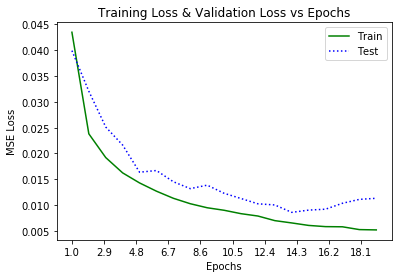

In [0]:
# #!pip install tensorboardcolab

# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping


# tbc=TensorBoardColab()

#### check to see if parameters are ok to continue
# try:
#     contin = input("Continue with model training? (Default = (y)? ")
# except ValueError:
#     contin = "y"
    
# if contin == "n":
#     sys.exit()

print('Building model...')


# ***
# 3) number of neurons / input_nodes increased for the LSTM layer
# ***
#input_nodes = 50
input_nodes = int(trainX.shape[2]+100)

# trim target arrays to match input lengths
if len(trainX) < len(trainY):
    trainY = np.asmatrix(trainY[:len(trainX)])
    
if len(testX) < len(testY):
    testY = np.asmatrix(testY[:len(testX)])

model = Sequential()
# ***
# 3) Actual change on the LSTM layer
# ***

def create_model(x_train, y_train, x_test, y_test):
               
stop_early = EarlyStopping(monitor='val_loss', patience=5, verbose=1 )

    
model.add(LSTM(input_nodes,activation='sigmoid', 
               recurrent_activation='tanh', stateful= False,return_sequences=True,
               input_shape=(trainX.shape[1], trainX.shape[2]) ))


    
for i in range(2):
    model.add(LSTM(100,  input_shape=(trainX.shape[1], trainX.shape[2]) , stateful= False, return_sequences=True))
    model.add(Dropout(0.3))
    
               
model.add(LSTM(50,  input_shape=(trainX.shape[1], trainX.shape[2]) ))
    

# add dropout for generalization (default = 0.2)
model.add(Dropout(0.3)) #- can't use dropout with Keras 2.1.2 anymore 


# 1 neuron on the output layer
model.add(Dense(1))

# compiles the model
model.compile(loss='mean_squared_error', optimizer='nadam', metrics = [metrics.mae])

print(model.summary())

# ***
# 4) Increased the batch_size to 72. This improves training performance by more than 50 times
# and loses no accuracy (batch_size does not modify the final result, only how memory is handled)
# ***
#### Start the clock




start1 = time.clock()

history = model.fit(trainX, trainY, 
                    
                    epochs = n_epochs,
                    batch_size = n_batch,
                    validation_data=(testX, testY)
                    ,verbose=1,  shuffle=False ,
                    callbacks = [stop_early ]
                   
                       )


    # stop clock
end1 = time.clock() 


    return model

if (end1-start1 > 60):
    print ("Model trained in {0:.1f} minutes".format((end1-start1)/60.))
else:
    print ("Model trained in {0:.1f} seconds".format((end1-start1)/1.))
    
## save the model

model.save('LSTM_test1.model')


# ***
# 5) test loss and training loss graph. It can help understand the optimal epochs size and if the model
# is overfitting or underfitting.
# ***
xhistory = len(history.history['loss'])
xlin = range(1,xhistory+1)
plt.close('all')
plt.plot(xlin,history.history['loss'],color="g", label='Train')
plt.plot(xlin,history.history['val_loss'], color = "b", linestyle = ':', label='Test')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.xticks(np.arange(min(xlin), max(xlin)+1, (max(xlin)+1 - min(xlin))/10))
plt.title('Training Loss & Validation Loss vs Epochs')
plt.legend()
plt.show()


In [0]:
# make predictions
trainPredict = model.predict(trainX )
testPredict = model.predict(testX)

# invert predictions
if str(process) == 'y':
      trainPredict = scalerY.inverse_transform(trainPredict)
      trainY = scalerY.inverse_transform(trainY)
      testPredict = scalerY.inverse_transform(testPredict)
      testY = scalerY.inverse_transform(testY)

In [0]:
print(np.shape(trainX))
print(np.shape(trainPredict))


(9259, 15, 56)
(9259, 1)


In [0]:
# 6) calculate mean absolute error. Different than root mean squared error this one
# is not so "sensitive" to bigger errors (does not square) and tells "how big of an error"
# we can expect from the forecast on average"
# ***
print('Prediction horizon = '+ str(lead_time),'Look back = ' + str(look_back))
trainScore = mean_absolute_error(trainY, trainPredict)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY, testPredict)
print('Test Score: %.2f MAE' % (testScore))

#####################################################

# calculate root mean squared error. 
# weights "larger" errors more by squaring the values when calculating

TrainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (TrainScore))
TestScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (TestScore))


Prediction horizon = 24 Look back = 15
Train Score: 29.25 MAE
Test Score: 32.12 MAE
Train Score: 44.09 RMSE
Test Score: 48.83 RMSE


In [0]:
print (testPredict[len(testPredict)-1])

len(testPredict) == len(testY)

print (testY[len(testY)-1])


[0.64168525]
[[0.67424244]]


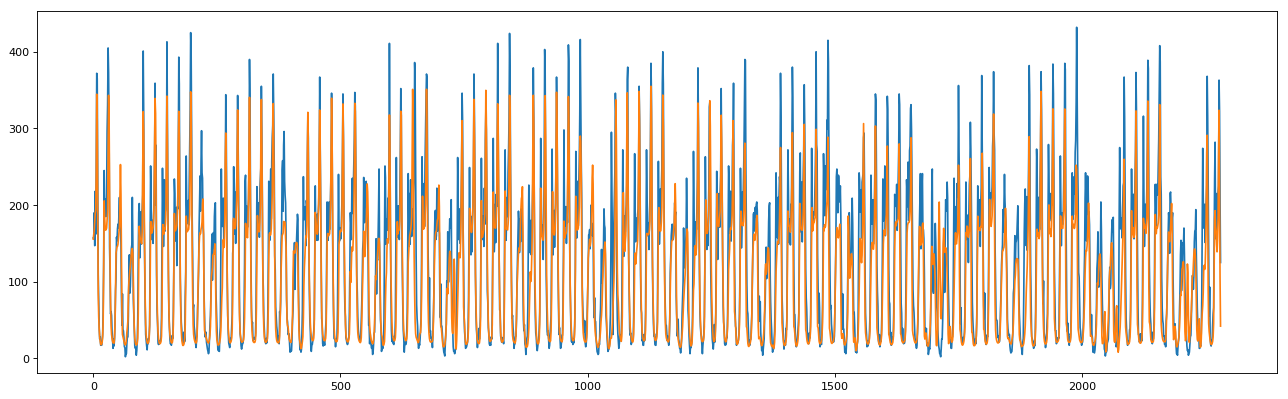

In [0]:
# plot baseline and predictions
#plt.close('all')
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(testY)
plt.plot(testPredict)
plt.show()

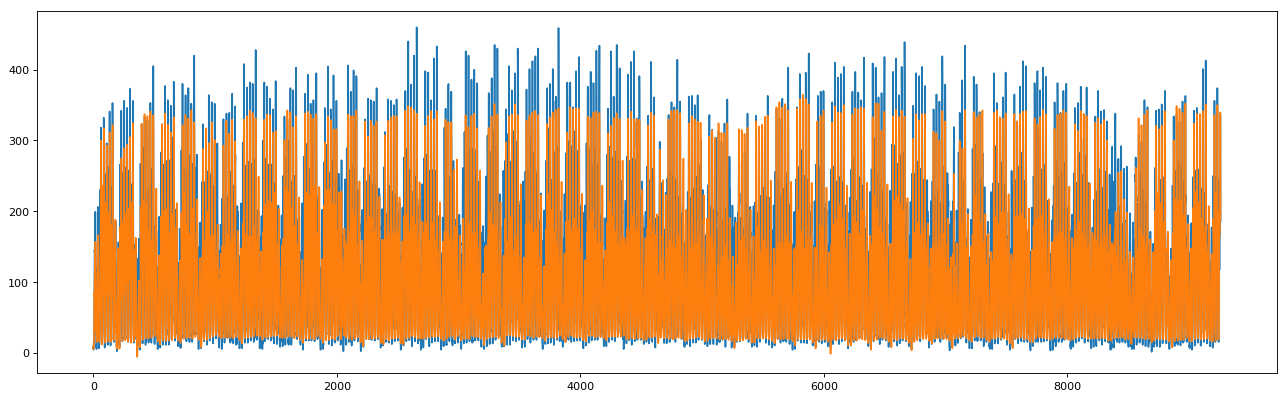

In [0]:
# plot baseline and predictions
#plt.close('all')
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(trainY)
plt.plot(trainPredict)
plt.show()

In [0]:

########################
######  write results to file
try:
    file_write = input("Save ouput file (y/n)? (Default = n)? ")
except ValueError:
    file_write = "n"

if file_write == "y":
    # make timestamp for unique filname
    stamp = str(time.clock())  #add timestamp for unique name
    stamp = stamp[0:2] 

    # generate filename and remove extra periods
    filename = 'FinErr_lstm_'+ str(n_epochs) + str(lead_time) + '_' + stamp + '.xlsx'    #example output file
    
    if filename.count('.') == 2:
        filename = filename.replace(".", "",1)
    writer = pd.ExcelWriter(filename)
    pd.DataFrame(trainPredict).to_excel(writer,'Train-predict') #save prediction output
    pd.DataFrame(trainY).to_excel(writer,'obs-train') #save observed output
    pd.DataFrame(testPredict).to_excel(writer,'Test-predict') #save output training data
    pd.DataFrame(testY).to_excel(writer,'obs_test') 
    writer.save()
    print('File saved in ', filename)

Save ouput file (y/n)? (Default = n)? 


In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


# invert predictions
if str(process) == 'y':
      trainPredict = scalerY.inverse_transform(trainPredict)
      trainY = scalerY.inverse_transform(trainY)
      testPredict = scalerY.inverse_transform(testPredict)
      testY = scalerY.inverse_transform(testY)

      # ***
# 6) calculate mean absolute error. Different than root mean squared error this one
# is not so "sensitive" to bigger errors (does not square) and tells "how big of an error"
# we can expect from the forecast on average"
# ***
print('Prediction horizon = '+ str(lead_time),'Look back = ' + str(look_back))
trainScore = mean_absolute_error(trainY, trainPredict)
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY, testPredict)
print('Test Score: %.2f MAE' % (testScore))

Prediction horizon = 24 Look back = 15
Train Score: 57982.91 MAE
Test Score: 58094.61 MAE


# Testing models on imputations

In [0]:
###### load the model
newModel = tf.keras.models.load_model('LSTM_test1.model')

W0627 09:58:39.477572 140244873725824 hdf5_format.py:258] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


In [0]:
print(np.shape(datatopredI))

data = scalerX.transform(datatopredI)

# data = np.expand_dims(data, axis=0)
# print(np.shape(data) )

data1 = TensorForm(data,look_back)
print(np.shape(data1) )

PredictI = model.predict(data1)
#invert back to real space

# print(np.shape(PredictI))
# print(target_col)


X_hat = scalerY.inverse_transform(PredictI)

print(X_hat,'\n')

print(datatopred[:])

(24, 56)
(10, 15, 56)
[[ 8.610986 ]
 [ 5.7854657]
 [ 5.06911  ]
 [ 6.315476 ]
 [ 7.495271 ]
 [ 9.813045 ]
 [17.48965  ]
 [50.044914 ]
 [82.98712  ]
 [78.95102  ]] 

[[ 10.]
 [  9.]
 [ 24.]
 [ 45.]
 [ 27.]
 [ 22.]
 [ 19.]
 [ 10.]
 [ 13.]
 [ 13.]
 [ 32.]
 [ 55.]
 [104.]
 [ 73.]
 [100.]
 [114.]
 [119.]
 [107.]
 [114.]
 [126.]
 [ 85.]
 [ 33.]
 [ 20.]
 [ 11.]]


In [0]:
#################
## Model is built - now go impute!
############## 


impute_file_name= drive.CreateFile({'id': '1--savgur5M36coH960hsPiQ3qJOC99u_'})
impute_file_name.GetContentFile('Grouped_data_unfiltered.csv')

filename = 'Grouped_data_unfiltered.csv'

dfimp = pd.read_csv('Grouped_data_unfiltered.csv')
dfimp = dfimp.drop('date',axis = 1)
dfimp = dfimp.drop(dfimp.columns[0],axis = 1)

dfi = dfimp.iloc[:,target_col]

dfimp = dfimp.drop(dfimp.columns[target_col],axis=1)

print(dfimp)

data_min = dfi.min()
data_max = dfi.max()

print(dfi)

dfi_np = dfi.values

dfi_np= dfi_np.reshape(-1,1)

print(np.shape(dfi_np))
#last_col_i = np.shape(dfi)[1]

#last_col_i = np.shape(dfi)[1] - 3 # do not impute the last to columns it's date encoding features

# ## convert NaNs to 1's and numbers to 0 in array df_null 0.0 to turn it to float true = missing = 1 else its zero

df_null = (dfi.isnull() + 0.).values

print('Loaded ' + filename + '...\n')
print('There are ' + str(len(dfi)) + ' total data points with ' +
       str(int(df_null.sum())) + ' observations missing' )

# ### find gaps
gaps = []

# # assumes first value of couplet is gap beginning and 2nd value is the end
for i in range(1,len(df_null)):
     if (df_null[i-1] == 0. and df_null[i] == 1.) or (df_null[i-1] == 1. and df_null[i] == 0.):
         gaps.append(i)
        
begin = gaps[0]
end = gaps[1]

print(np.shape(dfi_np))

dfi_old = copy.deepcopy(dfi_np)

       qt_dv00  vt_dv00  vt_dv01  ...   vt_dv26  cos_Feature_hour  sin_Feature_hour
0         15.0     98.0     82.0  ...       NaN     -2.588190e-01      9.659258e-01
1         11.0    105.0     96.0  ...       NaN      0.000000e+00      1.000000e+00
2         24.0    110.0    102.0  ...       NaN      2.588190e-01      9.659258e-01
3         51.0    109.0     96.0  ...       NaN      5.000000e-01      8.660254e-01
4         31.0    106.0     99.0  ...       NaN      7.071068e-01      7.071068e-01
5         24.0    102.0     96.0  ...       NaN      8.660254e-01      5.000000e-01
6         28.0    102.0     92.0  ...       NaN      9.659258e-01      2.588190e-01
7          9.0    102.0     88.0  ...       NaN      1.000000e+00      6.123234e-17
8          9.0    108.0     86.0  ...       NaN      9.659258e-01     -2.588190e-01
9         16.0    103.0     93.0  ...       NaN      8.660254e-01     -5.000000e-01
10        35.0    108.0     97.0  ...       NaN      7.071068e-01     -7.071

In [0]:
scalX = MinMaxScaler(feature_range=(0, 1))
scalY = MinMaxScaler(feature_range=(0, 1))

    
for mi in range(begin,end):
    mi = end
    if(mi- look_back<= 0 ):
        look_back = mi-3
    dfimp.fillna(value = 0, axis = 1,inplace=True)   
    
    print(dfimp)
    
    dfimpSCAL = scalX.fit_transform(dfimp.values[(mi-1)-(look_back):mi-1,:])

    imputeX = dfi_np[(mi-1)-(look_back):mi-1 ,:] # take last 3 values for look back
    
    print(imputeX)

    imputeX = imputeX.reshape(look_back,1)
         #add training max & min to properly scale
  
    imputeX = np.append(imputeX, data_min )
    imputeX = np.append(imputeX, data_max)
    
    imputeX = imputeX.reshape(-1,1)
    
    datasetI = scalY.fit_transform(imputeX) # convert to 0-1 min-max

    datasetI = datasetI[0:look_back,:] # remove min and max
          
    
    # add 2 each zero columns for tensor format
    datasetI = np.concatenate((datasetI, dfimpSCAL ), axis = 1)
    
    
    #print(datasetI)
                 
    dataIX = TensorForm(datasetI, look_back)  # convert to tensor
    print(dataIX)
    
    print(np.shape(dataIX))
    
    dataIX.fill
    # make predictions
    PredictI = model.predict(dataIX)
    print('')
    print(PredictI)
    
    #invert back to real space
    dfi_np[mi] = scalerY.inverse_transform(PredictI)
    print('Gap ' + str(mi) + ' = ' + str(dfi_np[mi]) )


       qt_dv00  vt_dv00  vt_dv01  ...   vt_dv26  cos_Feature_hour  sin_Feature_hour
0         15.0     98.0     82.0  ...    0.0000     -2.588190e-01      9.659258e-01
1         11.0    105.0     96.0  ...    0.0000      0.000000e+00      1.000000e+00
2         24.0    110.0    102.0  ...    0.0000      2.588190e-01      9.659258e-01
3         51.0    109.0     96.0  ...    0.0000      5.000000e-01      8.660254e-01
4         31.0    106.0     99.0  ...    0.0000      7.071068e-01      7.071068e-01
5         24.0    102.0     96.0  ...    0.0000      8.660254e-01      5.000000e-01
6         28.0    102.0     92.0  ...    0.0000      9.659258e-01      2.588190e-01
7          9.0    102.0     88.0  ...    0.0000      1.000000e+00      6.123234e-17
8          9.0    108.0     86.0  ...    0.0000      9.659258e-01     -2.588190e-01
9         16.0    103.0     93.0  ...    0.0000      8.660254e-01     -5.000000e-01
10        35.0    108.0     97.0  ...    0.0000      7.071068e-01     -7.071